# Import data and library

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import jinja2

In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.2 MB/s eta 0:00:00

In [4]:
from pycaret.regression import *

In [10]:
cd ./drive/MyDrive/Datathon/

/content/drive/MyDrive/Datathon


In [69]:
train = pd.read_csv('../data/training_for_aggregated_ver.csv')
macro_se = pd.read_csv('../data/macro_manual_selected_features.csv')
macro_pca = pd.read_csv('../data/macro_pca_selected_features.csv')
train.insert(0,'charge_off_pro',train['charge_off_p'])
train = train.drop('charge_off_p',axis=1)

In [199]:
train

,charge_off_pro,snapshot,mth_code,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,industry_A,industry_B,industry_C
0,0.000000,201801,201801,0.672928,1.000000,9.217998,0.111693,60.215480,785.094246,810.826223,25.731977,0.0,0.227112,0.583795,0.189093
1,0.003928,201801,201802,0.666902,0.996072,9.170578,0.111755,60.253425,771.162752,789.697385,18.534632,1.0,0.231315,0.582192,0.186493
2,0.004804,201801,201803,0.672330,0.995196,9.207221,0.108515,59.255512,770.332103,796.755381,26.423278,2.0,0.226032,0.588491,0.185477
3,0.003405,201801,201804,0.670054,0.996595,9.227755,0.112861,58.943188,775.782264,776.045289,0.263025,3.0,0.232075,0.582804,0.185121
4,0.004129,201801,201805,0.668672,0.995871,9.173745,0.109457,59.937905,775.811367,796.240531,20.429164,4.0,0.228601,0.582513,0.188886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.002647,201910,201911,0.532169,0.997353,9.373867,0.103176,58.953782,775.917080,786.746013,10.828933,1.0,0.223455,0.616919,0.159625
296,0.003121,201910,201912,0.527422,0.996828,9.394249,0.098844,59.038883,771.720375,805.916063,34.195688,2.0,0.227617,0.610099,0.162284
297,0.000000,201911,201911,0.534353,1.000000,9.479986,0.096321,56.129763,804.717327,801.638307,-3.079021,0.0,0.227959,0.609597,0.162444
298,0.002438,201911,201912,0.536012,0.997562,9.492889,0.097115,56.736337,812.448763,825.465287,13.016524,1.0,0.228820,0.610880,0.160301


In [70]:
macro_pca

,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6
0,201801,-6.517806,4.123471,-4.323530,0.185720,2.191525,2.575033
1,201802,-6.407877,3.912278,-4.092868,-0.005099,1.387246,1.921441
2,201803,-6.320073,3.500826,-3.598134,0.040396,1.329952,1.696535
3,201804,-6.475806,3.273602,-3.439609,0.314958,0.727026,1.330711
4,201805,-6.504495,2.724625,-2.887565,0.394235,0.783710,1.188454
5,201806,-6.361751,2.489270,-2.802809,0.369761,0.558054,0.400310
6,201807,-6.223080,1.984654,-2.464190,0.607792,0.311032,0.085349
7,201808,-6.072541,1.630106,-2.141376,0.744067,0.077647,-0.200107
8,201809,-5.929753,1.302250,-1.753394,0.172565,-0.052948,-0.498745
9,201810,-5.948962,0.859243,-2.038835,-0.219677,-0.679609,-1.324000


# 1. Training model using data including manually selected vaariables from macro_data.csv

In [74]:
join = pd.merge(train,macro_se,left_on='mth_code',right_on='date',how='left')

In [104]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   charge_off_pro        300 non-null    float64
 1   snapshot              300 non-null    int64  
 2   mth_code              300 non-null    int64  
 3   account_status_code   300 non-null    float64
 4   active                300 non-null    float64
 5   bank_fico_buckets_20  300 non-null    float64
 6   ever_delinquent_flg   300 non-null    float64
 7   mob                   300 non-null    float64
 8   stmt_balance          300 non-null    float64
 9   prev_balance          300 non-null    float64
 10  balance_decrease      300 non-null    float64
 11  month_diff            300 non-null    float64
 12  industry_A            300 non-null    float64
 13  industry_B            300 non-null    float64
 14  industry_C            300 non-null    float64
 15  date                  3

In [106]:
join = join.drop('active',axis=1)

In [139]:
join = join.drop('month',axis=1)

In [202]:
test = pd.read_csv('../data/test_for_aggregated_ver.csv')

In [205]:
test['date'] = test['date'].astype(int)

In [206]:
test

,charge_off,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,industry_A,industry_B,industry_C,date,unemployment_rate,debt_service_burden,consumer_credit,interest_rates,charge_off_rates
0,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,0.0,0.232709,0.591513,0.175778,202001,3.5,9.978751,2.429064,4.750000,4.103877
1,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,1.0,0.232709,0.591513,0.175778,202002,3.5,9.901571,2.365873,4.750000,3.992866
2,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,2.0,0.232709,0.591513,0.175778,202003,4.4,9.542168,2.320375,3.750000,3.483222
3,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,3.0,0.232709,0.591513,0.175778,202004,14.7,9.084334,2.116472,3.250000,3.137532
4,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,4.0,0.232709,0.591513,0.175778,202005,13.2,8.818207,2.377833,3.250000,3.767166
5,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,5.0,0.232709,0.591513,0.175778,202006,11.0,8.921575,2.542016,2.808626,5.788258
6,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,6.0,0.232709,0.591513,0.175778,202007,10.2,9.252138,2.815054,3.068610,8.500390
7,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,7.0,0.232709,0.591513,0.175778,202008,8.4,9.559778,3.438074,3.254417,10.844563
8,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,8.0,0.232709,0.591513,0.175778,202009,7.9,9.659441,4.303607,3.318058,11.968502
9,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,9.0,0.232709,0.591513,0.175778,202010,6.9,9.615622,5.216225,3.285077,12.068256


In [230]:
reg_test_1 = setup(data=join,
                   target='charge_off_pro',
                   train_size= 0.8,
                   fold=10)

,Description,Value
0,Session id,8346
1,Target,charge_off_pro
2,Target type,Regression
3,Original data shape,"(300, 20)"
4,Transformed data shape,"(300, 20)"
5,Transformed train set shape,"(240, 20)"
6,Transformed test set shape,"(60, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [233]:
best = compare_models(sort='rmse',n_select=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0003,0.0000,0.0004,0.8154,0.0004,0.1157,0.3690
gbr,Gradient Boosting Regressor,0.0003,0.0000,0.0004,0.7880,0.0004,0.1254,0.4310
xgboost,Extreme Gradient Boosting,0.0003,0.0000,0.0004,0.8125,0.0004,0.1157,0.2600
ada,AdaBoost Regressor,0.0003,0.0000,0.0004,0.8114,0.0004,0.1218,0.2640
dt,Decision Tree Regressor,0.0004,0.0000,0.0005,0.6949,0.0005,0.1502,0.3350
et,Extra Trees Regressor,0.0004,0.0000,0.0005,0.7549,0.0005,0.1138,0.3100
lightgbm,Light Gradient Boosting Machine,0.0005,0.0000,0.0007,0.4509,0.0007,0.1596,0.2540
omp,Orthogonal Matching Pursuit,0.0007,0.0000,0.0009,0.0234,0.0009,0.1612,0.2360
lr,Linear Regression,0.0007,0.0000,0.0009,0.0038,0.0009,0.1840,0.4680
br,Bayesian Ridge,0.0007,0.0000,0.0009,0.0602,0.0009,0.1754,0.2820


Processing:   0%|          | 0/84 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

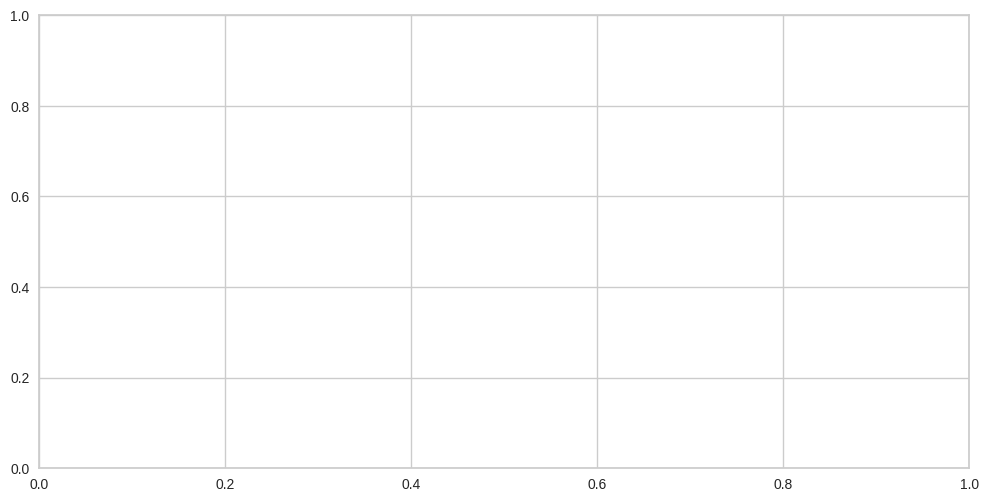

In [232]:
evaluate_model(best)

In [234]:
tuned_model = [tune_model(i) for i in best]
blended_model = blend_models(estimator_list=tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.6638,0.0004,0.1046
1,0.0004,0.0000,0.0006,0.7445,0.0006,0.1524
2,0.0004,0.0000,0.0005,0.7262,0.0005,0.1480
3,0.0004,0.0000,0.0005,0.7985,0.0005,0.1879
4,0.0004,0.0000,0.0005,0.7422,0.0005,0.1411
5,0.0004,0.0000,0.0005,0.6197,0.0005,0.1494
6,0.0004,0.0000,0.0005,0.5453,0.0005,0.1533
7,0.0003,0.0000,0.0004,0.8477,0.0004,0.1067
8,0.0004,0.0000,0.0005,0.7137,0.0005,0.1556


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0006,0.0000,0.0008,-0.1731,0.0008,0.1447
1,0.0008,0.0000,0.0012,-0.0116,0.0011,0.1605
2,0.0006,0.0000,0.0010,-0.0018,0.0010,0.1389
3,0.0009,0.0000,0.0012,-0.1081,0.0012,0.1756
4,0.0007,0.0000,0.0010,-0.0120,0.0010,0.1548
5,0.0005,0.0000,0.0008,-0.0203,0.0008,0.1457
6,0.0006,0.0000,0.0008,-0.0315,0.0008,0.1469
7,0.0007,0.0000,0.0011,-0.0014,0.0011,0.1313
8,0.0006,0.0000,0.0009,-0.0148,0.0009,0.1477


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.7333,0.0004,0.1086
1,0.0003,0.0000,0.0005,0.8366,0.0005,0.1367
2,0.0003,0.0000,0.0004,0.8311,0.0004,0.1063
3,0.0004,0.0000,0.0005,0.8345,0.0005,0.1451
4,0.0004,0.0000,0.0004,0.8072,0.0004,0.1216
5,0.0003,0.0000,0.0004,0.6941,0.0004,0.1280
6,0.0004,0.0000,0.0005,0.6735,0.0005,0.1256
7,0.0002,0.0000,0.0003,0.9164,0.0003,0.0766
8,0.0004,0.0000,0.0005,0.6557,0.0005,0.1591


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0002,0.0000,0.0003,0.8329,0.0003,0.0772
1,0.0003,0.0000,0.0005,0.8348,0.0005,0.1362
2,0.0003,0.0000,0.0004,0.8411,0.0004,0.1029
3,0.0003,0.0000,0.0004,0.8728,0.0004,0.1509
4,0.0003,0.0000,0.0004,0.8556,0.0004,0.1114
5,0.0003,0.0000,0.0004,0.7447,0.0004,0.1160
6,0.0003,0.0000,0.0004,0.7253,0.0004,0.1162
7,0.0003,0.0000,0.0003,0.9136,0.0003,0.0948
8,0.0004,0.0000,0.0005,0.7043,0.0005,0.1601


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0002,0.0000,0.0003,0.8310,0.0003,0.0824
1,0.0003,0.0000,0.0004,0.8459,0.0004,0.1261
2,0.0003,0.0000,0.0004,0.8521,0.0004,0.0970
3,0.0003,0.0000,0.0004,0.8818,0.0004,0.1436
4,0.0003,0.0000,0.0004,0.8698,0.0004,0.1039
5,0.0003,0.0000,0.0004,0.7434,0.0004,0.1156
6,0.0003,0.0000,0.0004,0.7046,0.0004,0.1195
7,0.0003,0.0000,0.0003,0.9005,0.0003,0.0936
8,0.0004,0.0000,0.0005,0.7317,0.0005,0.1465


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [235]:
final_model = finalize_model(blended_model)

In [238]:
test['snapshot'] = 25
test['mth_code']=list(range(25,38))

In [239]:
pred = predict_model(final_model,data=test)

In [242]:
result1 = pred['prediction_label']*19866

# 2.Training model using data including PCA variables from macro_data.csv

In [149]:
join2 = pd.merge(train,macro_pca,left_on='mth_code',right_on='Mnemonic',how='left')
join2 = join2.drop('active',axis=1)

In [150]:
reg_test_2 = setup(data=join2,
                   target='charge_off_pro',
                   train_size= 0.8,
                   fold=10)

,Description,Value
0,Session id,5757
1,Target,charge_off_pro
2,Target type,Regression
3,Original data shape,"(300, 21)"
4,Transformed data shape,"(300, 21)"
5,Transformed train set shape,"(240, 21)"
6,Transformed test set shape,"(60, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [155]:
best2 = compare_models(sort='rmse',n_select=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0003,0.0000,0.0004,0.7004,0.0004,0.1137,0.2670
gbr,Gradient Boosting Regressor,0.0003,0.0000,0.0004,0.7039,0.0004,0.1166,0.2380
xgboost,Extreme Gradient Boosting,0.0003,0.0000,0.0004,0.7107,0.0004,0.1129,0.2310
ada,AdaBoost Regressor,0.0003,0.0000,0.0004,0.7011,0.0004,0.1157,0.3740
dt,Decision Tree Regressor,0.0004,0.0000,0.0005,0.3745,0.0005,0.1551,0.2090
et,Extra Trees Regressor,0.0004,0.0000,0.0005,0.6148,0.0005,0.1141,0.2910
lightgbm,Light Gradient Boosting Machine,0.0005,0.0000,0.0007,0.1856,0.0007,0.1580,0.3110
en,Elastic Net,0.0006,0.0000,0.0009,-0.0700,0.0009,0.1428,0.2110
lasso,Lasso Regression,0.0006,0.0000,0.0009,-0.0700,0.0009,0.1428,0.3620
llar,Lasso Least Angle Regression,0.0006,0.0000,0.0009,-0.0700,0.0009,0.1428,0.3160


Processing:   0%|          | 0/84 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

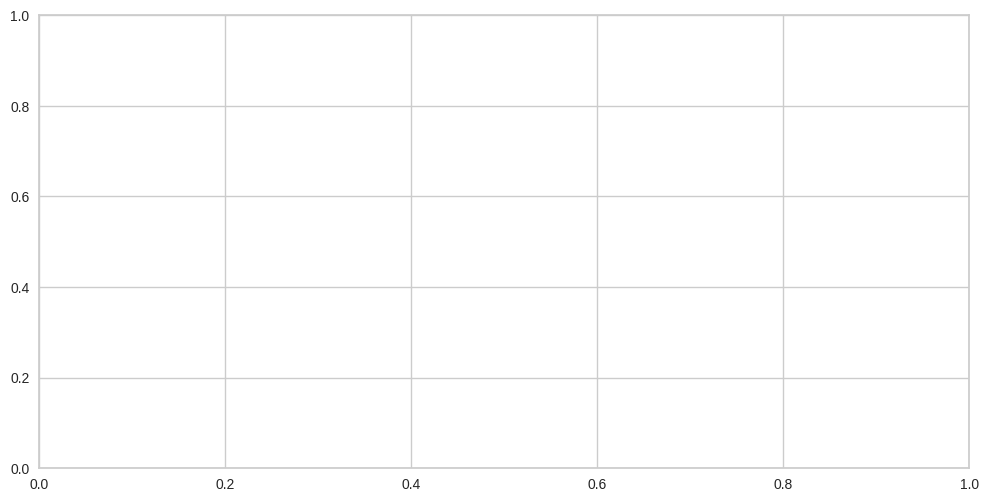

In [153]:
evaluate_model(best_tune2)

In [156]:
tuned_model2 = [tune_model(i) for i in best2]
blended_model2 = blend_models(estimator_list=tuned_model2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.8318,0.0004,0.1475
1,0.0004,0.0000,0.0005,0.6939,0.0005,0.1385
2,0.0003,0.0000,0.0004,-0.0271,0.0004,0.1111
3,0.0002,0.0000,0.0003,0.8821,0.0003,0.0885
4,0.0004,0.0000,0.0004,0.0256,0.0004,0.1326
5,0.0003,0.0000,0.0004,0.8137,0.0004,0.1275
6,0.0004,0.0000,0.0006,0.6378,0.0006,0.1377
7,0.0003,0.0000,0.0005,0.7847,0.0005,0.1096
8,0.0004,0.0000,0.0006,0.7357,0.0006,0.1672


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0004,0.0000,0.0005,0.7584,0.0005,0.1393
1,0.0005,0.0000,0.0006,0.4571,0.0006,0.1758
2,0.0003,0.0000,0.0004,0.1941,0.0004,0.0936
3,0.0003,0.0000,0.0004,0.8469,0.0004,0.0893
4,0.0003,0.0000,0.0004,0.1679,0.0004,0.1067
5,0.0003,0.0000,0.0004,0.8226,0.0004,0.1023
6,0.0004,0.0000,0.0005,0.7342,0.0005,0.1119
7,0.0005,0.0000,0.0007,0.5737,0.0007,0.1239
8,0.0005,0.0000,0.0006,0.7072,0.0006,0.1592


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.8881,0.0004,0.1124
1,0.0004,0.0000,0.0005,0.6327,0.0005,0.1540
2,0.0003,0.0000,0.0003,0.2637,0.0003,0.0956
3,0.0002,0.0000,0.0002,0.9331,0.0002,0.0692
4,0.0003,0.0000,0.0003,0.3764,0.0003,0.0870
5,0.0003,0.0000,0.0003,0.8888,0.0003,0.0990
6,0.0003,0.0000,0.0004,0.8154,0.0004,0.1024
7,0.0003,0.0000,0.0004,0.8603,0.0004,0.1024
8,0.0004,0.0000,0.0005,0.7436,0.0005,0.1663


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0002,0.0000,0.0004,0.8887,0.0004,0.1112
1,0.0004,0.0000,0.0005,0.6456,0.0005,0.1516
2,0.0003,0.0000,0.0003,0.2713,0.0003,0.0890
3,0.0002,0.0000,0.0002,0.9353,0.0002,0.0648
4,0.0003,0.0000,0.0003,0.3815,0.0003,0.0890
5,0.0003,0.0000,0.0003,0.8632,0.0003,0.1156
6,0.0003,0.0000,0.0004,0.8417,0.0004,0.1090
7,0.0003,0.0000,0.0004,0.8126,0.0004,0.1173
8,0.0004,0.0000,0.0005,0.7443,0.0005,0.1595


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0003,0.0000,0.0004,0.8787,0.0004,0.1166
1,0.0004,0.0000,0.0005,0.6438,0.0005,0.1528
2,0.0003,0.0000,0.0003,0.2726,0.0003,0.0934
3,0.0002,0.0000,0.0002,0.9399,0.0002,0.0638
4,0.0003,0.0000,0.0003,0.3927,0.0003,0.0911
5,0.0003,0.0000,0.0003,0.8846,0.0003,0.1076
6,0.0003,0.0000,0.0004,0.8437,0.0004,0.1042
7,0.0003,0.0000,0.0004,0.8499,0.0004,0.1024
8,0.0004,0.0000,0.0005,0.7533,0.0005,0.1593


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [212]:
test2 = test.drop(list(test.columns)[14:],axis=1)

In [214]:
join3 = pd.merge(test2,macro_pca,left_on='date',right_on='Mnemonic',how='left')

In [224]:
join3['snapshot'] = 25
join3['mth_code']=list(range(25,38))

In [225]:
join3

,charge_off,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,...,date,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6,snapshot,mth_code
0,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,0.0,...,202001,202001,-1.856554,-5.821525,5.494517,-0.339981,0.915484,2.559434,25,25
1,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,1.0,...,202002,202002,-1.020297,-5.373535,5.584773,-0.146384,0.654626,2.424868,25,26
2,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,2.0,...,202003,202003,3.029591,1.647299,4.584357,-3.366677,-0.869353,2.019133,25,27
3,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,3.0,...,202004,202004,12.733836,15.860646,6.003231,-5.283120,-2.289682,0.525662,25,28
4,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,4.0,...,202005,202005,8.517669,7.010738,5.628701,6.240463,-0.722073,0.316772,25,29
5,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,5.0,...,202006,202006,9.192309,3.993088,3.253805,6.908311,2.253149,-1.237295,25,30
6,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,6.0,...,202007,202007,11.171562,2.633307,1.110278,-0.359771,3.177080,-1.946020,25,31
7,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,7.0,...,202008,202008,10.298942,-1.702275,-1.131791,-2.514622,4.209849,-1.838010,25,32
8,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,8.0,...,202009,202009,10.801266,-3.661333,-2.878512,-2.568015,3.104257,-1.318762,25,33
9,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002588,779.913831,29.911243,9.0,...,202010,202010,11.809978,-3.739603,-4.302757,-1.282643,0.757147,-0.355716,25,34


In [157]:
final_model2 = finalize_model(blended_model)

In [226]:
pred2 = predict_model(final_model2,data=join3)

In [227]:
pred2

,charge_off,account_status_code,active,bank_fico_buckets_20,ever_delinquent_flg,mob,stmt_balance,prev_balance,balance_decrease,month_diff,...,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6,snapshot,mth_code,prediction_label
0,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,0.0,...,202001,-1.856554,-5.821525,5.494516,-0.339981,0.915484,2.559434,25,25,0.000088
1,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,1.0,...,202002,-1.020298,-5.373535,5.584773,-0.146384,0.654626,2.424868,25,26,0.002977
2,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,2.0,...,202003,3.029591,1.647299,4.584357,-3.366677,-0.869353,2.019133,25,27,0.003084
3,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,3.0,...,202004,12.733836,15.860646,6.003232,-5.283120,-2.289682,0.525662,25,28,0.003095
4,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,4.0,...,202005,8.517670,7.010738,5.628701,6.240463,-0.722073,0.316772,25,29,0.003118
5,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,5.0,...,202006,9.192309,3.993088,3.253805,6.908310,2.253149,-1.237295,25,30,0.003203
6,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,6.0,...,202007,11.171561,2.633307,1.110278,-0.359771,3.177080,-1.946020,25,31,0.003294
7,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,7.0,...,202008,10.298943,-1.702275,-1.131791,-2.514622,4.209849,-1.838010,25,32,0.003251
8,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,8.0,...,202009,10.801266,-3.661333,-2.878512,-2.568015,3.104258,-1.318762,25,33,0.003135
9,0.0,0.609685,1.0,9.537451,0.106111,57.512836,750.002563,779.913818,29.911243,9.0,...,202010,11.809978,-3.739603,-4.302757,-1.282643,0.757147,-0.355716,25,34,0.003132


In [229]:
result2 = pred2['prediction_label']*19866
result2

0      1.738465
1     59.135519
2     61.263651
3     61.494314
4     61.943564
5     63.631378
6     65.439455
7     64.584174
8     62.270957
9     62.217482
10    61.146933
11    60.721549
12    58.578170
Name: prediction_label, dtype: float64

In [248]:
result1.sum()

752.2950048231174

In [244]:
result2.sum()

744.1656116067214

# Submission File

In [252]:
sub = pd.read_csv('../data/results_TEAMNAME.csv')
sub

,Month,accounts_charged_off
0,202002,NaN
1,202003,NaN
2,202004,NaN
3,202005,NaN
4,202006,NaN
5,202008,NaN
6,202009,NaN
7,202010,NaN
8,202011,NaN
9,202012,NaN


In [253]:
sub['accounts_charged_off'] = result1

In [255]:
sub.to_csv('results_RAINING.csv')